# Step 3: Correlation Matrix 🔢



...

#### 📚 Required Libraries 
To calculate the correlation matrix, I need the following libraries:

### 🛠️ Steps 
1. 

2. 

3. 

4. 

____

### 🛠️ ???

In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the files
clipped_grid_4326 = gpd.read_file("clipped_grid_4326_resampled.geojson")
clipped_grid_4326

,chl,no3,nppv,o2,ph,po4,zsd,bottomT,siconc,sithick,...,vo,VHM0,VTPK,VHM0_SW2,VTM01_SW2,VSDX,VSDY,VMXL,VCMX,geometry
0,1.296142,1.948022,2061.086670,298.318359,8.170540,0.448378,13.289579,5.764658,0.000002,0.000901,...,0.013473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((10.03035 58.25918, 10.03459 58.25935..."
1,1.296142,1.948022,2061.086670,298.318359,8.170540,0.448378,13.289579,5.764658,0.000002,0.000901,...,0.013473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((10.03003 58.26142, 10.03428 58.26158..."
2,1.296142,1.948022,2061.086670,298.318359,8.170540,0.448378,13.289579,5.764658,0.000002,0.000901,...,0.013473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((10.02972 58.26365, 10.03396 58.26382..."
3,1.296142,1.948022,2061.086670,298.318359,8.170540,0.448378,13.289579,5.764658,0.000002,0.000901,...,0.013473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((10.0294 58.26589, 10.03365 58.26606,..."
4,1.296142,1.948022,2061.086670,298.318359,8.170540,0.448378,13.289579,5.764658,0.000002,0.000901,...,0.013473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((10.02909 58.26813, 10.03333 58.26829..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240351,2.066166,4.442574,4904.499512,339.698975,8.116159,0.476782,8.747138,10.923197,0.000301,0.000693,...,0.010729,0.183812,1.904343,0.002662,3.607306,0.012438,0.010186,0.181435,0.303292,"POLYGON ((13.05616 55.68358, 13.06013 55.68364..."
240352,2.093574,4.126968,5018.654297,339.690918,8.116018,0.473815,8.742012,10.967905,0.000416,0.000840,...,0.005482,0.201089,1.934109,0.002864,3.834101,0.014327,0.006925,0.197785,0.333264,"POLYGON ((13.06113 55.66344, 13.0651 55.6635, ..."
240353,2.093574,4.126968,5018.654297,339.690918,8.116018,0.473815,8.742012,10.967905,0.000416,0.000840,...,0.005482,0.201089,1.934109,0.002864,3.834101,0.014327,0.006925,0.197785,0.333264,"POLYGON ((13.06102 55.66568, 13.06499 55.66575..."
240354,2.093574,4.126968,5018.654297,339.690918,8.116018,0.473815,8.742012,10.967905,0.000416,0.000840,...,0.005482,0.201089,1.934109,0.002864,3.834101,0.014327,0.006925,0.197785,0.333264,"POLYGON ((13.06091 55.66793, 13.06488 55.66799..."


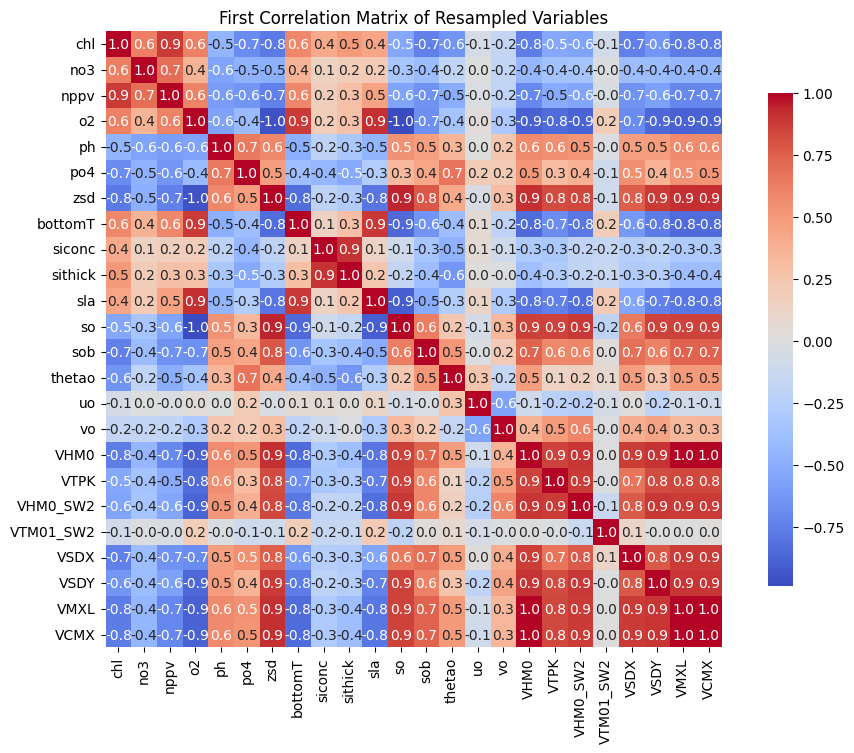

In [15]:
# Calculate the correlation matrix without the geometry column
correlation_matrix = clipped_grid_4326.drop(columns=['geometry']).corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('First Correlation Matrix of Resampled Variables')
plt.show()



The goal is to have values between -0,8 and 0,8. If the correlation index of 2 variables is higher than 0,8 in absolut value, it means the 2 variables are higly correlated. Correlated values are useless as input of a model, that's why I need to delete one of them. For example the last variable `'VCMX'` corresponding to ??? is highly correlated to `'chl', 'o2', 'zsd', 'bottomT', 'sla', 'so', 'VHM0', 'VTPK', 'VHM0_SW2', 'VSDX', 'VSDY', 'VMXL'`. That's why I will not use it as an input of my model. Let's check each variable and plot a better matrix.

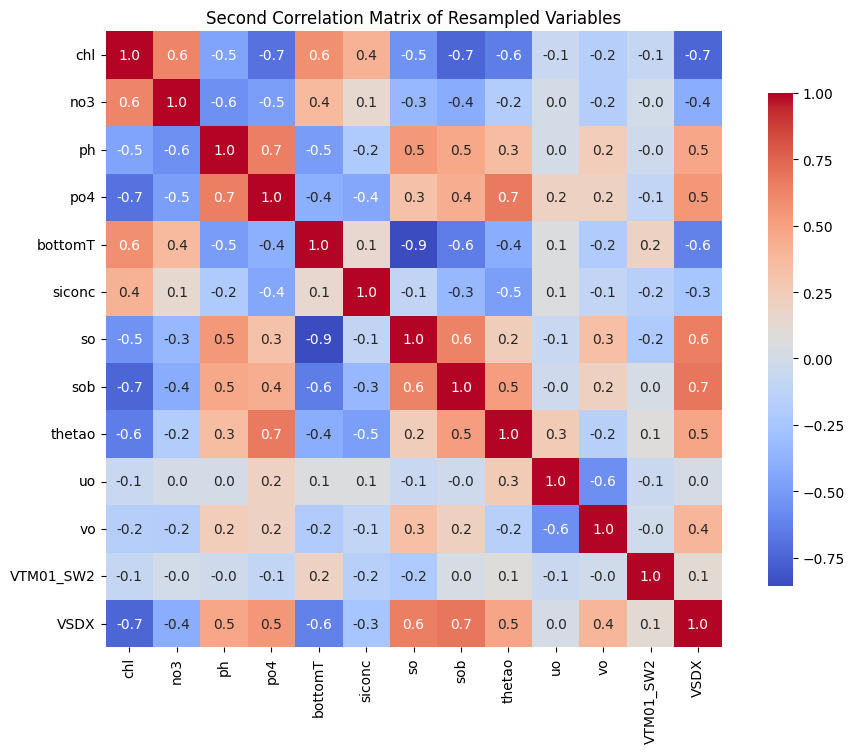

In [16]:
correlation_matrix = clipped_grid_4326.drop(columns=['geometry', 'VCMX', 'nppv', 'o2', 'zsd', 'sla','VHM0','VMXL','sithick','VHM0_SW2','VSDY','VTPK']).corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Second Correlation Matrix of Resampled Variables')
plt.show()

`'bottomT'`and`'so'`are highly correlated. It is difficult to choose between them but I will keep the salinity because it is a more common variable and because they used it in the [Estonian study](https://www.nature.com/articles/s41598-023-47176-8).

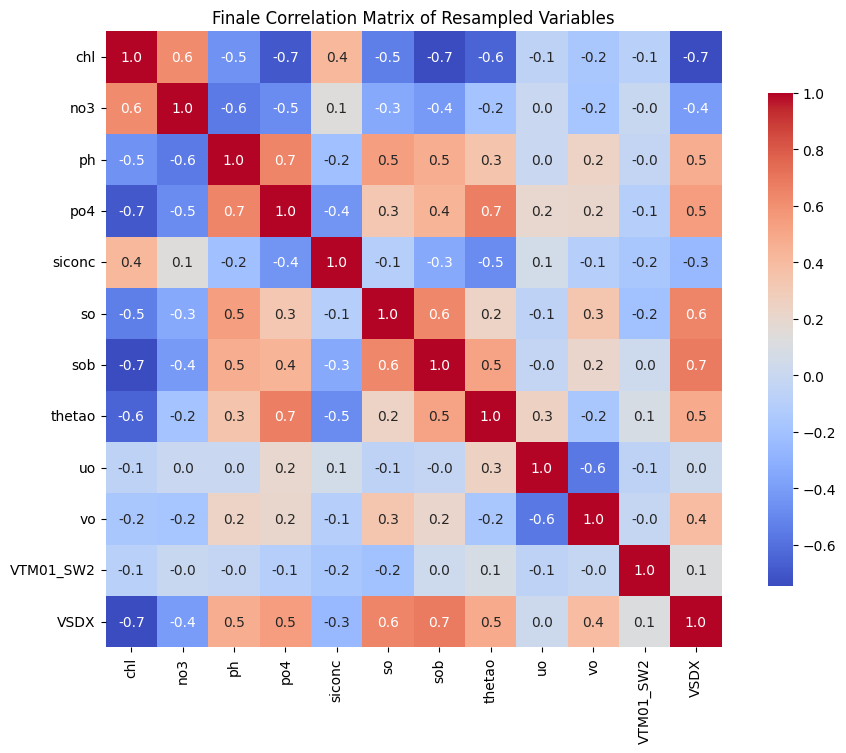

In [17]:
correlation_matrix = clipped_grid_4326.drop(columns=['geometry', 'VCMX', 'nppv', 'o2', 'zsd', 'sla','VHM0','VMXL','sithick','VHM0_SW2','VSDY','VTPK','bottomT']).corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Finale Correlation Matrix of Resampled Variables')
plt.show()